In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
fs = 18

# Histogram

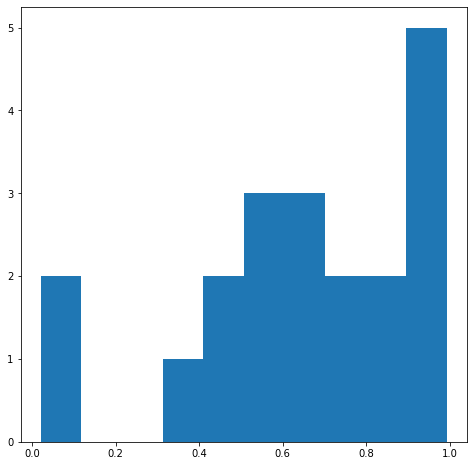

In [3]:
rand_uniform = np.random.uniform(0,1,20)


ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})

axe.hist(rand_uniform, 10)
plt.show()

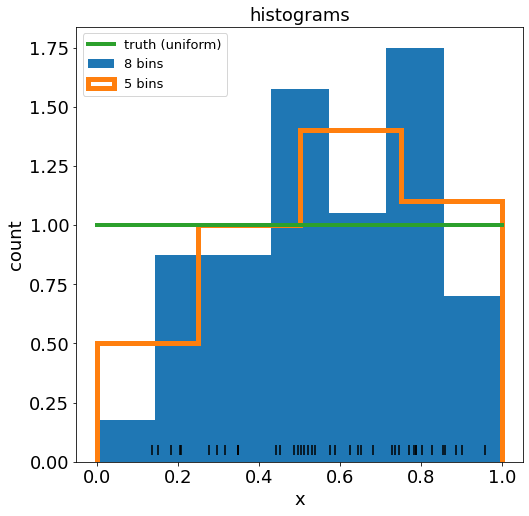

In [5]:
rand_uniform = np.random.uniform(0,1,40)


ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})

axe.hist(rand_uniform, bins=np.linspace(0,1,8), label='8 bins', density=True)
axe.hist(rand_uniform, bins=np.linspace(0,1,5), histtype='step', lw=5, label='5 bins', density=True)
axe.plot(np.linspace(0,1,5), np.ones(5), lw=4, label='truth (uniform)')

axe.scatter(rand_uniform, 0.05*np.ones_like(rand_uniform), s=100, color='k', zorder=10, marker='|' )

axe.legend(fontsize=fs-5)
axe.tick_params(labelsize=fs)
axe.set_xlabel('x', fontsize=fs)
axe.set_ylabel('count', fontsize=fs)
plt.title('histograms', fontsize=fs)
plt.show()

# This is especially dangerous when plotting log plots... 

In [5]:
print( np.logspace(-3,np.log10(5),20))

[1.00000000e-03 1.56560656e-03 2.45112389e-03 3.83749564e-03
 6.00800835e-03 9.40617727e-03 1.47263728e-02 2.30557058e-02
 3.60961643e-02 5.65123915e-02 8.84761707e-02 1.38518873e-01
 2.16866056e-01 3.39526920e-01 5.31565572e-01 8.32222546e-01
 1.30293308e+00 2.03988057e+00 3.19365039e+00 5.00000000e+00]


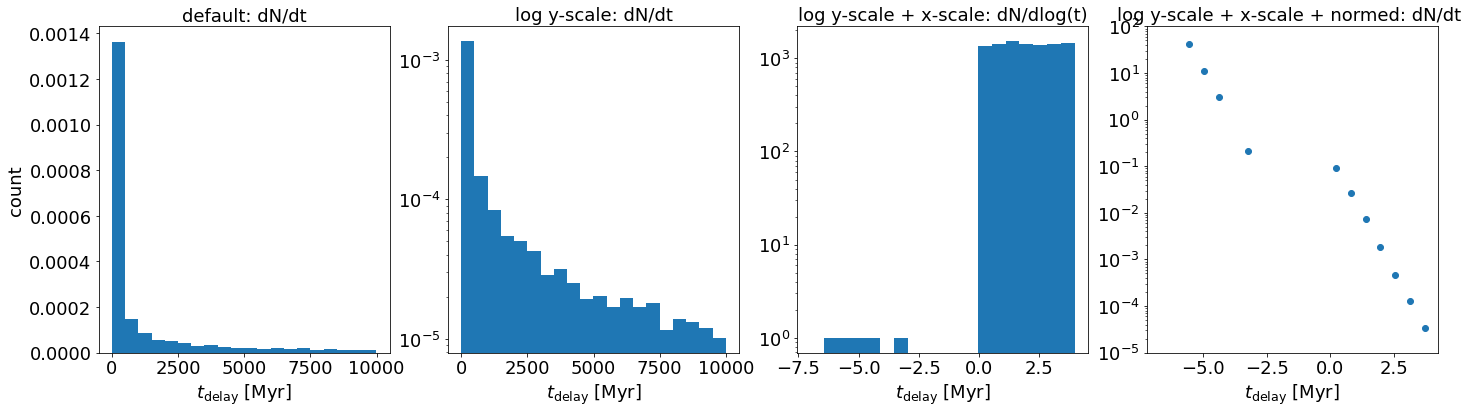

In [8]:


def sampling_powerlaw(Nsamples=1):
    '''returns  Nsamples samples drawn
    from a power law '''
    # constants:
    slope=1.01
    min_m1, max_m1 = 1, 10000 # e.g. Gur 
    
    samples = ((np.random.uniform(0, 1, Nsamples)) *\
        (max_m1**(1.-slope) - min_m1**(1.-slope)) \
        + min_m1**(1-slope))**(1./(1.-slope))
    return samples


rand_pl = sampling_powerlaw(Nsamples=10000)
rare_pl = np.logspace(-6, -3.5,5)

samples_mix = np.concatenate((rand_pl, rare_pl))

ncols, nrows = 4,1
f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,6), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})
for ind_axe, axe in enumerate(axes):
    
    
    
    
#     axe.legend(fontsize=fs)
    axe.tick_params(labelsize=fs)
    axe.set_xlabel(r'$t_{\rm{delay}}$ [Myr]', fontsize=fs)
    
    Nbins = 20
    if ind_axe==0:
        axe.hist(samples_mix, bins=Nbins, label='histogram', density=True)
        axe.set_title('default: dN/dt', fontsize=fs)
        axe.set_ylabel('count', fontsize=fs)
        
    if ind_axe==1:
        axe.hist(samples_mix, bins=Nbins, label='histogram', density=True)
        axe.set_yscale('log')
        axe.set_title('log y-scale: dN/dt', fontsize=fs)
        
    if ind_axe==2:
        maxval, minval = 4, -7
        bins = np.linspace(minval, maxval, Nbins)
        axe.hist(np.log10(samples_mix), bins=bins, label='histogram', density=False)
        axe.set_yscale('log')
        axe.set_title('log y-scale + x-scale: dN/dlog(t)', fontsize=fs)
    if ind_axe==3:
        
        maxval, minval = 4, -7
        bins = np.linspace(minval, maxval, Nbins)
        dx = 10**bins[1:]-10**bins[0:-1]
        hist_x = (bins[1:]+bins[0:-1])/2

        
    
        
        hist, bin_edges = np.histogram(np.log10(samples_mix), bins=bins,  density=True)
        axe.scatter(hist_x, hist/dx)

        
#         weights.fill(1 * Nbins / (maxval-minval) / samples_mix.size)
        
# plt.hist(x, bins=n, range=(minval, maxval), weights=weights)       
#         axe.hist(np.log10(samples_mix), bins=bins, label='histogram', density=True)
        axe.set_yscale('log')
        axe.set_ylim(0.00001,100)
#         axe.set_xscale('log')
        axe.set_title('log y-scale + x-scale + normed: dN/dt ', fontsize=fs)    

plt.show()

# Kernel density estimator

Text(0, 0.5, 'count')

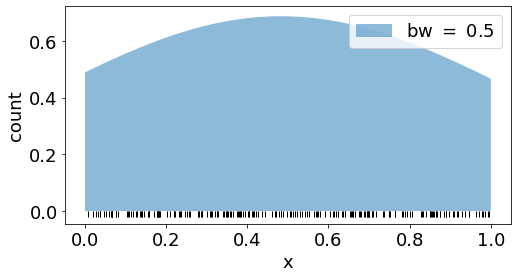

In [9]:
from sklearn.neighbors import KernelDensity

ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,4), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})

x= np.random.uniform(0,1,200)

x_d = np.linspace(0,1,1000) # x values to calculate prob on

bw = 0.5 # bandwidth

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5, label=r'bw $=$ %s'%bw)


plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)


axe.legend(fontsize=fs)
axe.tick_params(labelsize=fs)
axe.set_xlabel('x', fontsize=fs)
axe.set_ylabel('count', fontsize=fs)

# plt.ylim(-0.02, 0.22)

Text(0.5, 0, 'x')

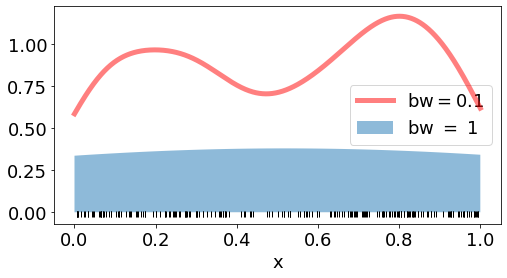

In [310]:
from sklearn.neighbors import KernelDensity

ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,4), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})


x= np.random.uniform(0,1,200)
x_d = np.linspace(0,1,1000)

bw=1
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5, label=r'bw $=$ %s'%bw)


bw=0.1
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'bw$=$%s'%bw,zorder=10, lw=5, color='r')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)



axe.legend(fontsize=fs)
axe.tick_params(labelsize=fs)
axe.set_xlabel(xlabel='x', fontsize=fs)
# axe.set_ylabel('count', fontsize=fs)


In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);
grid.best_params_

{'bandwidth': 0.1}

Text(0, 0.5, 'count')

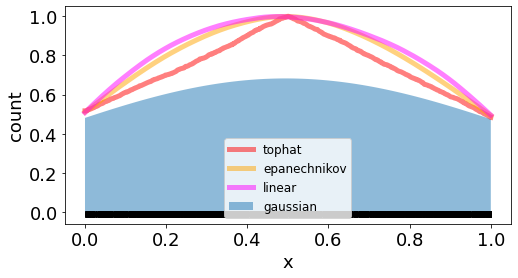

In [18]:
from sklearn.neighbors import KernelDensity

ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,4), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})


x= np.random.uniform(0,1,2000)
x_d = np.linspace(0,1,1000)

bw=.5
kernel='gaussian'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel)


kernel='tophat'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='r')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

kernel='epanechnikov'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='orange')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)


kernel='linear'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='magenta')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)


axe.legend(fontsize=fs-6, loc='lower center')
axe.tick_params(labelsize=fs)
axe.set_xlabel('x', fontsize=fs)
axe.set_ylabel('count', fontsize=fs)


# SEABORN

/Users/floorbroekgaarden/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

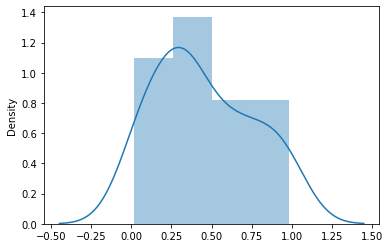

In [7]:
import seaborn as sns

x= np.random.uniform(0,1,50)
## Simple histogram, weighted to reveal probabilities

## Histogram + kde, but clearly something has gone wrong
sns.distplot(x, hist=True, kde=True) 

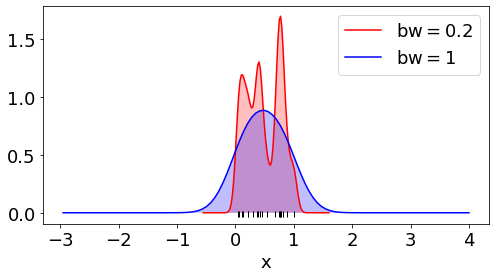

In [303]:
ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,4), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})

# x= np.random.uniform(0,1,20)
x= np.random.uniform(0,1,20)
bw = 0.2
axe = sns.kdeplot(x, shade=True, color="r", bw=bw, label=r'bw$=$%s'%bw)

bw = 1
axe = sns.kdeplot(x, shade=True, color="b", bw=bw, label=r'bw$=$%s'%bw)
axe.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)





axe.legend(fontsize=fs)
axe.tick_params(labelsize=fs)
axe.set_xlabel(xlabel='x', fontsize=fs)


plt.show()

# SCIPY + different ways of calculating bandwidths

In [251]:
import scipy
from scipy import stats

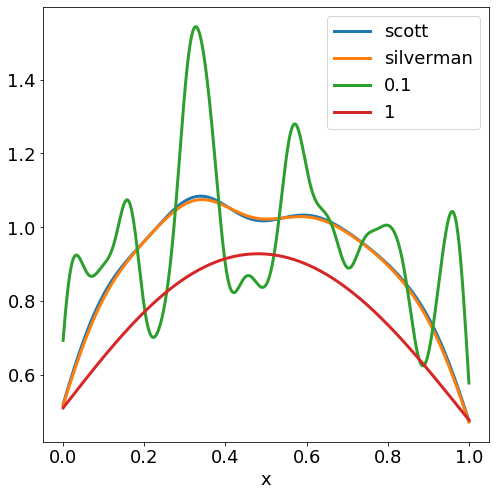

In [312]:
x= np.random.uniform(0,1,200)


ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})


for bw_method in ['scott',  'silverman', 0.1, 1]:
    kde = stats.gaussian_kde(x, weights=np.ones_like(x) , bw_method =bw_method)        
    yy = kde(x_d)    
    axe.plot(x_d, yy, lw=3, label='%s'%bw_method)




axe.legend(fontsize=fs)
axe.tick_params(labelsize=fs)
axe.set_xlabel(xlabel='x', fontsize=fs)


plt.show()

# Discontinous data 

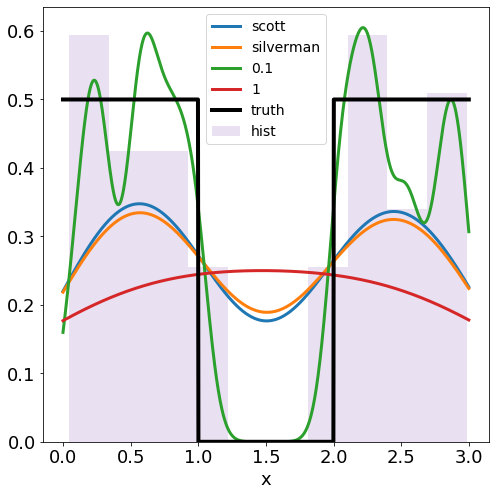

In [278]:
x =  np.concatenate((np.random.uniform(0,1,20),np.random.uniform(2,3,20)))
x_d = np.linspace(0,3,900)
true = np.ones_like(x_d)*0.5
true[300:600] = np.zeros(300)

ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})


for bw_method in ['scott',  'silverman', 0.1, 1]:
    kde = stats.gaussian_kde(x, weights=np.ones_like(x) , bw_method =bw_method)        
    yy = kde(x_d)    
    axe.plot(x_d, yy, lw=3, label='%s'%bw_method)



axe.hist(x, label='hist',zorder=0, alpha=0.2, density=True)

axe.plot(x_d,true, c='k', lw=4, label='truth')

axe.legend(fontsize=fs-4)
axe.tick_params(labelsize=fs)
axe.set_xlabel(xlabel='x', fontsize=fs)

# axe.set_xlim(,5)

plt.show()

# Recovering delta function:

Text(0, 0.5, 'count')

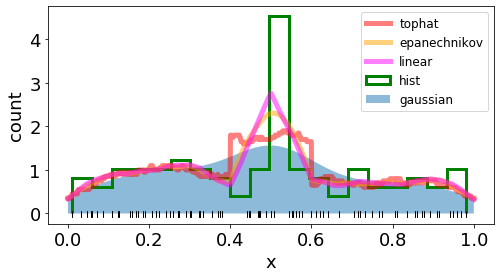

In [289]:
from sklearn.neighbors import KernelDensity

ncols, nrows = 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,4), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})


x1= np.random.uniform(0,1,80)
x2 = np.ones(20)*0.5
x=np.concatenate((x1,x2))
x_d = np.linspace(0,1,1000)


bw=.1
kernel='gaussian'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel)


kernel='tophat'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='r')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

kernel='epanechnikov'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='orange')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)


kernel='linear'
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bw, kernel=kernel)
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), alpha=0.5, label=r'%s'%kernel,zorder=10, lw=5, color='magenta')
# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)



plt.hist(x,20,color='green', label='hist', density=True, histtype='step', lw=3)


axe.legend(fontsize=fs-6, loc='upper right')
axe.tick_params(labelsize=fs)
axe.set_xlabel('x', fontsize=fs)
axe.set_ylabel('count', fontsize=fs)


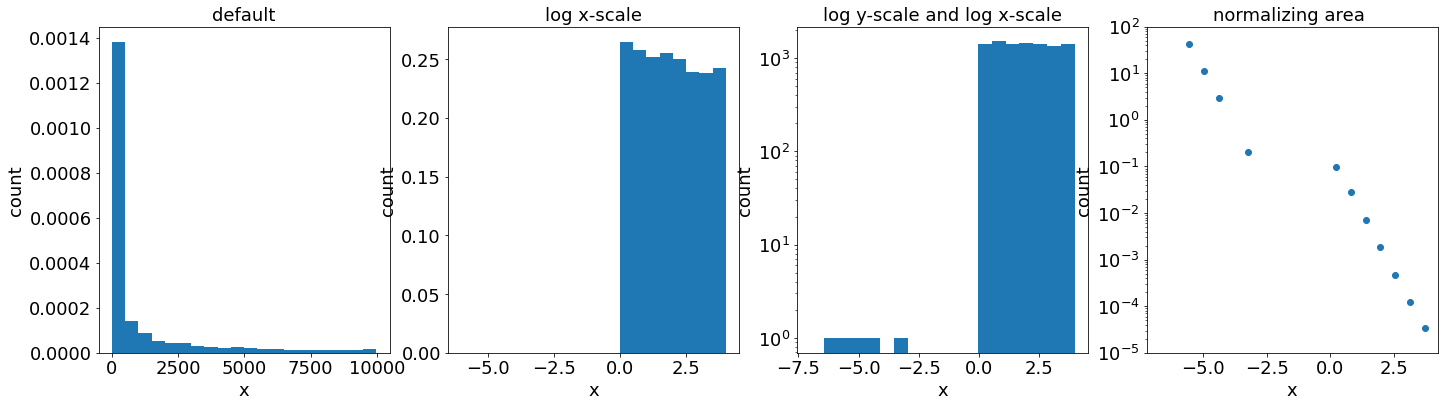

In [7]:


def sampling_powerlaw(Nsamples=1):
    '''returns  Nsamples samples drawn
    from a power law '''
    # constants:
    slope=1.01
    min_m1, max_m1 = 1, 10000 # e.g. Gur 
    
    samples = ((np.random.uniform(0, 1, Nsamples)) *\
        (max_m1**(1.-slope) - min_m1**(1.-slope)) \
        + min_m1**(1-slope))**(1./(1.-slope))
    return samples


rand_pl = sampling_powerlaw(Nsamples=10000)
rare_pl = np.logspace(-6, -3.5,5)

samples_mix = np.concatenate((rand_pl, rare_pl))

ncols, nrows = 4,1
f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,6), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":2*np.ones(nrows)})
for ind_axe, axe in enumerate(axes):
    
    
    
    
#     axe.legend(fontsize=fs)
    axe.tick_params(labelsize=fs)
    axe.set_xlabel('x', fontsize=fs)
    axe.set_ylabel('count', fontsize=fs)
    Nbins = 20
    if ind_axe==0:
        axe.hist(samples_mix, bins=Nbins, label='histogram', density=True)
        axe.set_title('default', fontsize=fs)
    
    if ind_axe==1:
        axe.hist(np.log10(samples_mix), bins=Nbins, label='histogram', density=True)
#         axe.set_yscale('log')
        axe.set_title('log x-scale', fontsize=fs)
        
    if ind_axe==2:
        maxval, minval = 4, -7
        bins = np.linspace(minval, maxval, Nbins)
        axe.hist(np.log10(samples_mix), bins=bins, label='histogram', density=False)
        axe.set_yscale('log')
        axe.set_title('log y-scale and log x-scale', fontsize=fs)
    if ind_axe==3:
        
        maxval, minval = 4, -7
        bins = np.linspace(minval, maxval, Nbins)
        dx = 10**bins[1:]-10**bins[0:-1]
        hist_x = (bins[1:]+bins[0:-1])/2

        
    
        
        hist, bin_edges = np.histogram(np.log10(samples_mix), bins=bins,  density=True)
        axe.scatter(hist_x, hist/dx)

        
#         weights.fill(1 * Nbins / (maxval-minval) / samples_mix.size)
        
# plt.hist(x, bins=n, range=(minval, maxval), weights=weights)       
#         axe.hist(np.log10(samples_mix), bins=bins, label='histogram', density=True)
        axe.set_yscale('log')
        axe.set_ylim(0.00001,100)
#         axe.set_xscale('log')
        axe.set_title('normalizing area ', fontsize=fs)    

plt.show()

## Standard KDE does weird stuff at the boundaries 

In [20]:

import scipy 
import seaborn as sns

# from scipy import stats
# import scipy.stats as stats

class MirroredKDE(scipy.stats.gaussian_kde):
    """ KDE class that mirrors data at boundaries to account for bounded support """

    def __init__(self, data, weights=None, lower_bound=None, upper_bound=None,
                 bw_method=None, bw_adjust=None):
        """ instantiate class in similar way to scipy but with some additions """
        super().__init__(data, weights=weights, bw_method=bw_method)

        # also store the lower and upper bounds
        self._lower_bound = lower_bound
        self._upper_bound = upper_bound

        # allow adjustment of the default bandwidth similar to seaborn
        if bw_adjust is not None:
            self.set_bandwidth(self.factor * bw_adjust)

    def evaluate(self, x_vals=None, x_min=None, x_max=None, x_count=200):
        """ evaluate the kde taking into account the boundaries """

        # only return x_vals when they aren't supplied
        return_x_vals = x_vals is None

        if x_vals is None:
            if x_min is None:
                x_min = np.min(self.dataset)
            if x_max is None:
                x_max = np.max(self.dataset)
            x_vals = np.linspace(x_min, x_max, x_count)

        # make a copy of the data before I mirror anything
        unmirrored_x_vals = np.copy(x_vals)

        # evaluate the kde at the original x values
        kde_vals = super().evaluate(x_vals)

        # if either bound is present then mirror the data and
        # add the evaluated kde for the mirrored data to the original
        if self._lower_bound is not None:
            x_vals = 2.0 * self._lower_bound - x_vals
            kde_vals += super().evaluate(x_vals)
            x_vals = unmirrored_x_vals

        if self._upper_bound is not None:
            x_vals = 2.0 * self._upper_bound - x_vals
            kde_vals += super().evaluate(x_vals)
            x_vals = unmirrored_x_vals

        if return_x_vals:
            return x_vals, kde_vals
        else:
            return kde_vals

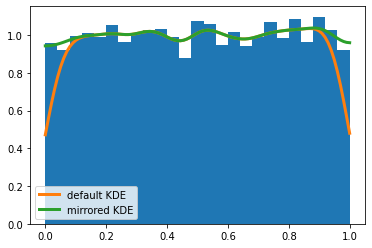

In [23]:
random_data = np.random.uniform(0, 1, 10000)
x_vals = np.linspace(0, 1, 100)

plt.hist(random_data, bins=25, density=True)

regular_kde = scipy.stats.gaussian_kde(random_data)
plt.plot(x_vals, regular_kde.evaluate(x_vals), lw=3, label='default KDE')

new_kde = MirroredKDE(random_data, lower_bound=0.0, upper_bound=1.0)
plt.plot(x_vals, new_kde.evaluate(x_vals), lw=3, label='mirrored KDE')


plt.legend()
plt.show() 